In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Set the paths to the dataset folders

In [ ]:
train_folder = '/content/drive/MyDrive/chest_xray/chest_xray/train'
val_folder = '/content/drive/MyDrive/chest_xray/chest_xray/val'
test_folder = '/content/drive/MyDrive/chest_xray/chest_xray/test'

Set the image dimensions

In [ ]:
img_width, img_height = 224, 224


Set the number of training and validation samples


In [ ]:
train_samples = sum([len(files) for r, d, files in os.walk(train_folder)])
val_samples = sum([len(files) for r, d, files in os.walk(val_folder)])

Set the batch size


In [ ]:
batch_size = 32

In [ ]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for validation and test images
val_test_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
# Prepare the training data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Prepare the validation data
val_generator = val_test_datagen.flow_from_directory(
    val_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Prepare the test data
test_generator = val_test_datagen.flow_from_directory(
    test_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_samples // batch_size
)

Epoch 1/10
163/163 [==============================] - 503s 3s/step - loss: 0.4744 - accuracy: 0.7941
Epoch 2/10
163/163 [==============================] - 131s 803ms/step - loss: 0.2621 - accuracy: 0.8953
Epoch 3/10
163/163 [==============================] - 132s 808ms/step - loss: 0.2192 - accuracy: 0.9103
Epoch 4/10
163/163 [==============================] - 130s 796ms/step - loss: 0.2192 - accuracy: 0.9168
Epoch 5/10
163/163 [==============================] - 130s 795ms/step - loss: 0.1871 - accuracy: 0.9250
Epoch 6/10
163/163 [==============================] - 130s 798ms/step - loss: 0.1621 - accuracy: 0.9379
Epoch 7/10
163/163 [==============================] - 131s 801ms/step - loss: 0.1593 - accuracy: 0.9408
Epoch 8/10
163/163 [==============================] - 131s 800ms/step - loss: 0.1447 - accuracy: 0.9433
Epoch 9/10
163/163 [==============================] - 130s 799ms/step - loss: 0.1417 - accuracy: 0.9440
Epoch 10/10
163/163 [==============================] - 129s 794ms/s

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

20/20 [==============================] - 131s 7s/step - loss: 0.4043 - accuracy: 0.8478
Test Loss: 0.4043012261390686
Test Accuracy: 0.8477563858032227


In [ ]:
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch+1}/{len(history.history['accuracy'])}")
    print(f"Train loss: {history.history['loss'][epoch]:.4f} - Train accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"Validation loss: {history.history['val_loss'][epoch]:.4f} - Validation accuracy: {history.history['val_accuracy'][epoch]:.4f}")
    print()



Epoch 1/10
Train loss: 0.4744 - Train accuracy: 0.7941


KeyError: ignored

In [ ]:
# Get the predicted labels and ground truth labels for the test data
y_pred = model.predict(test_generator).flatten()
y_true = test_generator.classes

20/20 [==============================] - 8s 357ms/step


In [ ]:
# Convert predicted probabilities to class labels
y_pred = np.round(y_pred)

In [ ]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[179  55]
 [  8 382]]


KeyError: ignored

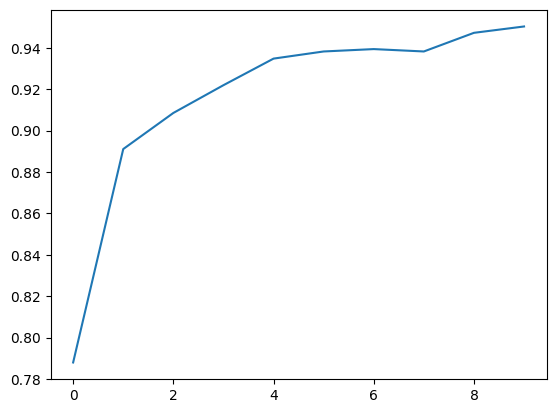

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

KeyError: ignored

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Get the predicted labels and ground truth labels for the test data
y_pred = model.predict(test_generator).flatten()
y_true = test_generator.classes

# Convert predicted probabilities to class labels
y_pred = np.round


20/20 [==============================] - 8s 370ms/step
